<a href="https://colab.research.google.com/github/cicerojr10/projeto_visualizacao_informacao/blob/main/projeto_visualizacaoDaInformacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Visualização de informação

Cícero Quintino Junior - Ciência da Computação

RGM: 31422306

Dataset utilizado dísponivel em: https://www.kaggle.com/datasets/anandhuh/covid19-in-world-countrieslatest-data

Tema do Dataset: Dados da Covid-19 em 05 de janeiro de 2023

In [ ]:
!pip install squarify
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import squarify
import plotly.graph_objects as go
import networkx as nx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


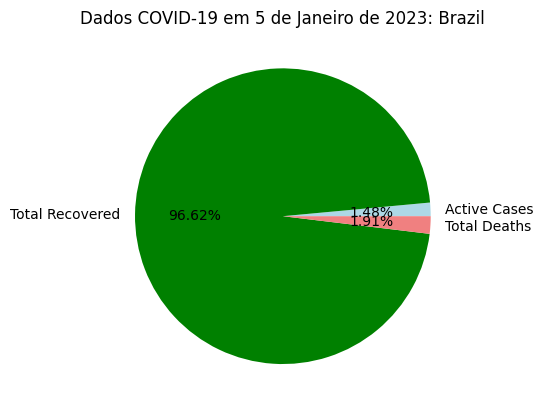

In [ ]:
# Ler os dados do arquivo CSV
dados1 = pd.read_csv('worldwide_covid_data.csv')

#  Filtrar e remover linhas que possuem pelo menos um valor ausente
dados1 = dados1.dropna()

# Definir o país de foco
country_focus = 'Brazil'
# Filtrar os dados para o país de foco
dados_country_focus = dados1[dados1['Country/Other'] == country_focus]

# Obter os valores de casos ativos, recuperados e mortes para o país de foco
# Utilizando o filtro de valores correspondentes das colunas com o '.iloc[0]'.
ativos = dados_country_focus['Active Cases'].iloc[0]
recuperados = dados_country_focus['Total Recovered'].iloc[0]
mortes = dados_country_focus['Total Deaths'].iloc[0]

# Definir rótulos e valores para o gráfico de pizza
rotulos = ['Active Cases','Total Recovered','Total Deaths']
valores = [ativos , recuperados, mortes]

# Modificar cores para melhor visualização
colors = ['lightblue','green','lightcoral']

# Criar o gráfico de pizza
fig, ax = plt.subplots()
pie = ax.pie(valores, labels=rotulos, colors=colors, autopct='%.2f%%') # Utilizei essa formatação numérica para exibir os valores das fatias com duas casas decimais e acrescentar o símbolo de porcentagem no final.
ax.set_title('Dados COVID-19 em 5 de Janeiro de 2023: {}'.format(country_focus))
# Mostrar o gráfico
plt.show()

## Exibição do gráfico de setores para mostrar a distribuição percentual dos casos ativos, recuperados e mortes no Brasil no dia 5 de Janeiro de 2023.

In [ ]:
# Ler os dados do arquivo CSV
dados2 = pd.read_csv('worldwide_covid_data.csv')

#  Atualizar o dataset para conter apenas as linhas que não possuem valores ausentes
dados2 = dados2.dropna()

# Selecionar os países da América Latina
paises_americalatina = ['Brazil', 'Argentina', 'Mexico', 'Colombia', 'Peru']
df_americalatina = dados2[dados2['Country/Other'].isin(paises_americalatina)].copy()

# Calcular o número total de casos
df_americalatina['Total Cases'] = df_americalatina['Active Cases'] + df_americalatina['Total Recovered'] + df_americalatina['Total Deaths']

# Calcular as porcentagens de casos ativos, recuperados e mortes
dados_americalatina_percent = {
    'Country/Other': df_americalatina['Country/Other'],
    'Active Cases (%)': round(df_americalatina['Active Cases'] / df_americalatina['Total Cases'] * 100, 2),
    'Total Recovered (%)': round(df_americalatina['Total Recovered'] / df_americalatina['Total Cases'] * 100, 2),
    'Total Deaths (%)': round(df_americalatina['Total Deaths'] / df_americalatina['Total Cases'] * 100, 2)
}

# Criar um gráfico de treemap com os dados da América Latina
fig = go.Figure(go.Treemap(
    labels=dados_americalatina_percent['Country/Other'],
    parents=['', '', '', '', ''], # Definir todos os países como raízes
    values=dados_americalatina_percent['Active Cases (%)'],
    marker_colorscale='Viridis'
))

# Configurar o layout do gráfico
fig.update_layout(title='Distribuição dos casos ativos de COVID-19 em alguns Países da América Latina.')

# Exibir o gráfico
fig.show()

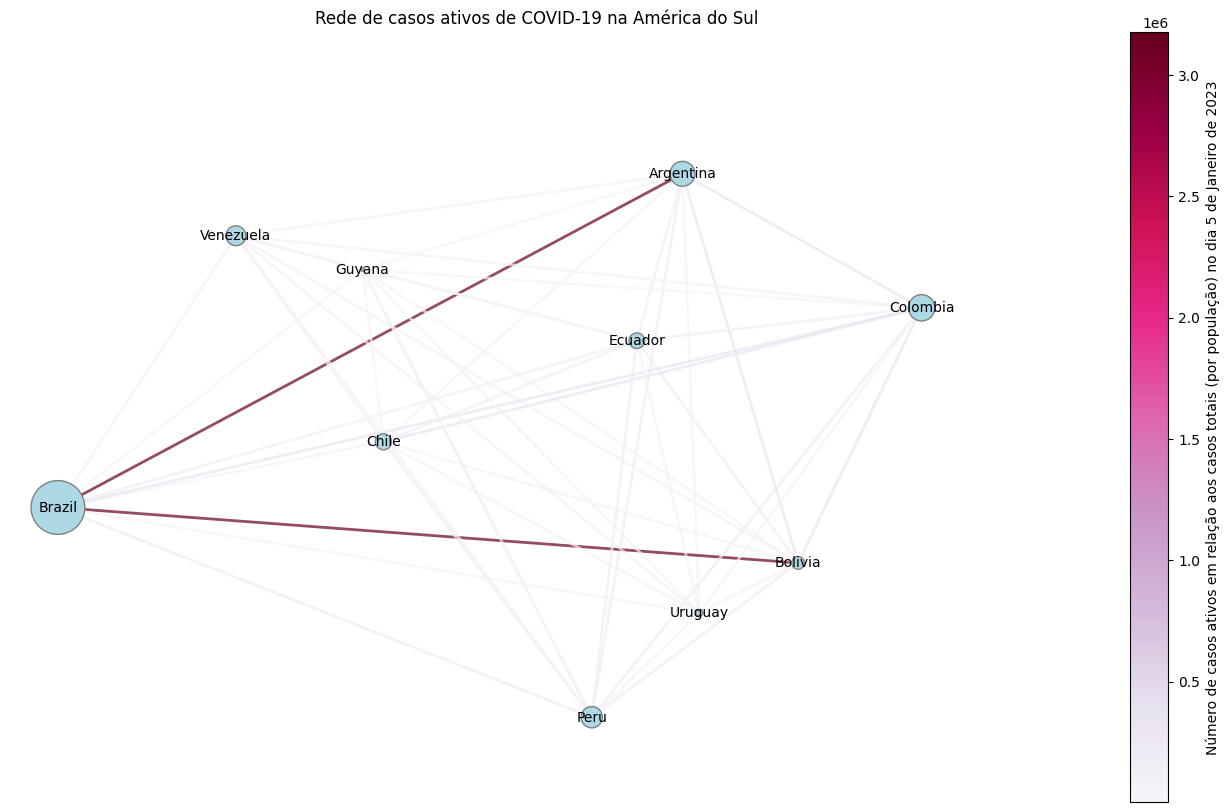

In [ ]:
# Ler os dados do arquivo CSV
dados3 = pd.read_csv('worldwide_covid_data.csv', usecols=['Country/Other', 'Total Cases', 'Active Cases', 'Population'])
dados3 = dados3.dropna()

# Selecionar os países da América do Sul com dados disponíveis
americasul = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Peru', 'Uruguay', 'Venezuela']
dados3 = dados3[dados3['Country/Other'].isin(americasul)]

# Criar um grafo vazio usando a biblioteca NetworkX
G = nx.Graph()

# Adicionar nós para cada país da América do Sul ao grafo
for i, row in dados3.iterrows():
    G.add_node(row['Country/Other'])

# Adicionar arestas ao grafo
for i, row1 in dados3.iterrows():
    for j, row2 in dados3.iterrows():
        if i != j:
            # Calcular o peso da aresta como a proporção de casos ativos em relação aos casos totais, multiplicado pela população
            peso = row1['Active Cases'] / row1['Total Cases'] * row1['Population']
            G.add_edge(row1['Country/Other'], row2['Country/Other'], weight=peso)


# Definir a posição dos nós usando o algoritmo Spring Layout
pos = nx.spring_layout(G, seed=42, k=0.3)

# Calcular o tamanho dos nós com base na população
max_pop = dados3['Population'].max()
node_size = dados3['Population'] / max_pop * 1000 * 1.5

# Obter os pesos das arestas
pesos = [G[u][v]['weight'] for u, v in G.edges()]

# Definir o mapa de cores
cmap = cm.PuRd

# Criar a figura do gráfico
plt.figure(figsize=(17, 10))

# Desenhar os nós
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='lightblue', edgecolors='gray')

# Desenhar as arestas
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color=pesos, edge_cmap=cmap)

# Adicionar rótulos aos nós
labels = {pais: pais for pais in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='black')

# Configurar os limites do gráfico
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Remover os eixos
plt.axis('off')

# Criar a barra de cores
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(pesos), vmax=max(pesos)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label='Número de casos ativos em relação aos casos totais (por população) no dia 5 de Janeiro de 2023')

# Adicionar o título ao gráfico
plt.title('Rede de casos ativos de COVID-19 na América do Sul')

# Exibir o gráfico
plt.show()

## For credit purposes
###Author: Worldometers.info

###Publishing Date: 1 June, 2023

###Place of publication: Dover, Delaware, U.S.A.

##Fonte
####Link: https://www.worldometers.info/coronavirus/#countries